<a href="https://colab.research.google.com/github/Marsilea-viz/marsilea-workshop/blob/main/Marsilea_Intro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install marsilea

# Import Marsilea

The convention for importing Marsilea is
- `marsilea` -> `ma`
- `marsilea.plotter` -> `mp`

In [2]:
import numpy as np

import marsilea as ma
import marsilea.plotter as mp

# Step 0: Prepare some random data

In [3]:
mat = np.random.randn(10, 15)

# Step1: Initiate a canvas

## What to learn?

<img src="https://raw.githubusercontent.com/Marsilea-viz/marsilea-workshop/main/asset/API-Canvas.png" width="300px">

There are different canvas in Marsilea, from preset canvas like `Heatmap` and `Layers` to empty canvas like `WhiteBoard` or `ClusterBoard`.

You can adjust the size of the main canvas by setting `width` and `height`.

---

## Tryout

- Adjust the `width` to 3 and see what happen?


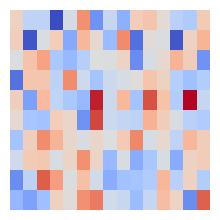

In [4]:
h = ma.Heatmap(mat, width=2, height=2)
h.render()

# Step 2: Add one more plot

## What to learn?

<img src="https://raw.githubusercontent.com/Marsilea-viz/marsilea-workshop/main/asset/API-Add-Plotter.png" width="500px">

Adding plots to a canvas is very straight forward, you can called `add_*` method and add the plotter, adjust the `size` and `pad` to control the layout.

Almost every plotter can accept a `label` paramter, it can be used to add a text label for the plotter.

---

## Tryout

- Add another plotter like `Bar` or `Violine` and see the difference.
- Adjust `size` and `pad` and see how the changes in plotter.

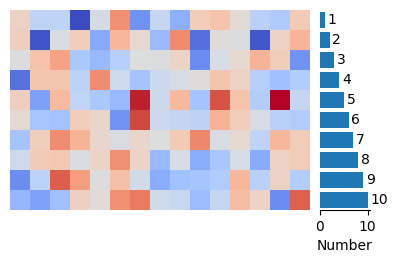

In [5]:
h = ma.Heatmap(mat, width=3, height=2)
h.add_right(mp.Numbers(np.arange(10) + 1, label="Number"), size=0.5, pad=0.1)
h.render()

# Step 3: Split the canvas

The canvas can be split or group by the labels on x or y-axis.

- Split by index: `cut_rows` or `cut_cols`
- Group by labels: `group_rows` or `group_cols`



### Split with `cut_rows`

<img src="https://raw.githubusercontent.com/Marsilea-viz/marsilea-workshop/main/asset/API-cut-rows.png" width="300px">

---

## Tryout

- Try to split on index 4 and 8
- Try to split by columns


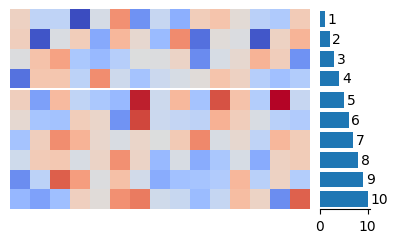

In [6]:
h = ma.Heatmap(mat, width=3, height=2)
h.add_right(mp.Numbers(np.arange(10) + 1), size=0.5, pad=0.1)
h.cut_rows([4])
h.render()

### Group by `group_rows`

<img src="https://raw.githubusercontent.com/Marsilea-viz/marsilea-workshop/main/asset/API-group-rows.png" width="450px">

To help you understand the process, another plotter `Labels` is added on the left to label the rows. It's a plotter used to display text.

---

## Tryout
- Try to change the order of labels


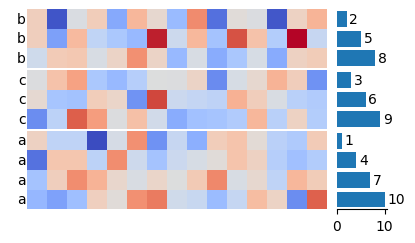

In [7]:
labels = ["a", "b", "c", "a", "b", "c", "a", "b", "c", "a"]

h = ma.Heatmap(mat, width=3, height=2)
h.add_right(mp.Numbers(np.arange(10) + 1), size=0.5, pad=0.1)
h.add_left(mp.Labels(labels))
h.group_rows(labels, order=["b", "c", "a"])
h.render()

### Label the groups

There is a special plotter `Chunk` that can use to label a chunk of canvas.

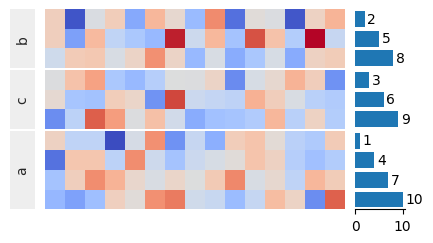

In [8]:
h = ma.Heatmap(mat, width=3, height=2)
h.add_right(mp.Numbers(np.arange(10) + 1), size=0.5, pad=0.1)
h.add_left(mp.Chunk(["b", "c", "a"], "#EEE"), pad=0.1)
h.group_rows(labels, order=["b", "c", "a"])
h.render()

# Step 4: Cluster data and add dendrogram

<img src="https://raw.githubusercontent.com/Marsilea-viz/marsilea-workshop/main/asset/API-add-dendrogram.png" width="500px">

One thing to notice is that when the canvas is split, clustering happens in both within a chunk and between chunks.

---

## Tryout

- Cluster on the top side?
- Cluster the data but set `show=False` to see what will happen?
- Cluster only within a chunk using `add_base=True` and `add_meta=False`
- Cluster only between chunks using `add_base=False` and `add_meta=True`

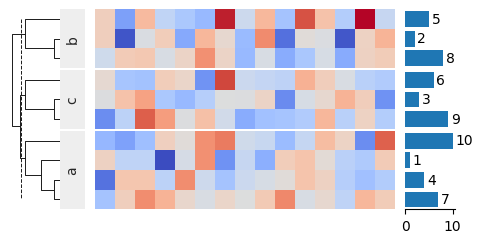

In [9]:
h = ma.Heatmap(mat, width=3, height=2)
h.add_right(mp.Numbers(np.arange(10) + 1), size=0.5, pad=0.1)
h.add_left(mp.Chunk(["b", "c", "a"], "#EEE"), pad=0.1)
h.group_rows(labels, order=["b", "c", "a"])
h.add_dendrogram("left")
h.render()

# Step 5: Add legends

The legend can be configured in each plotter, notice that here, we can simply configurate the title of colorbar by passing `label` to the `Heatmap`.

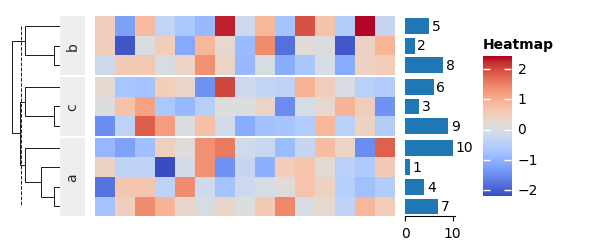

In [10]:
h = ma.Heatmap(mat, width=3, height=2, label="Heatmap")
h.add_right(mp.Numbers(np.arange(10) + 1), size=0.5, pad=0.1)
h.add_left(mp.Chunk(["b", "c", "a"], "#EEE"), pad=0.1)
h.group_rows(labels, order=["b", "c", "a"])
h.add_dendrogram("left")
h.add_legends()
h.render()